<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate rectangle detection.

In [1]:
# Import all necessary libraries.
import os
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load default configuration file.
NOMEROFF_NET_DIR = "/var/www/nomeroff-net/"
MASK_RCNN_DIR = "/var/www/Mask_RCNN/"

MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs/")
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")

sys.path.append(NOMEROFF_NET_DIR)

In [3]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters, RectDetector

Using TensorFlow backend.


In [4]:
# Initialize rect detector with default configuration.
rectDetector = RectDetector()
# Initialize npdetector with default configuration.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
# Load weights in keras format.
nnet.loadModel(MASK_RCNN_MODEL_PATH)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


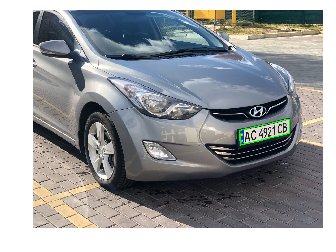

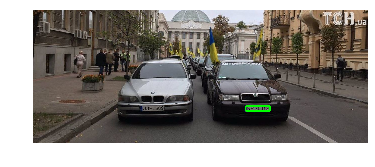

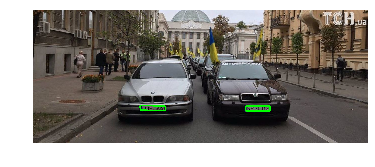

In [5]:
rootDir = "images/"
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)
        NP = nnet.detect([img])
        
        # Generate image mask.
        cv_img_masks = filters.cv_img_mask(NP) 
       
        
        res = []
        for img_mask in cv_img_masks:
            points = rectDetector.detect(img_mask, 0)
            points = rectDetector.detect(img_mask, fixRectangleAngle=1, outboundWidthOffset=3)
            
            filters.draw_box(img, points, (0, 255, 0), 3)
            plt.axis("off")
            #zone = rectDetector.get_cv_zones(img, points)
            plt.imshow(img)
            plt.show()